In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.svm import SVC, LinearSVC


# Modelling Helpers :

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")

Setup complete...


In [2]:
asd = pd.read_csv('Autism_dataset.csv')
asd

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [3]:
asd.describe()
asd.columns
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [4]:
asd.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

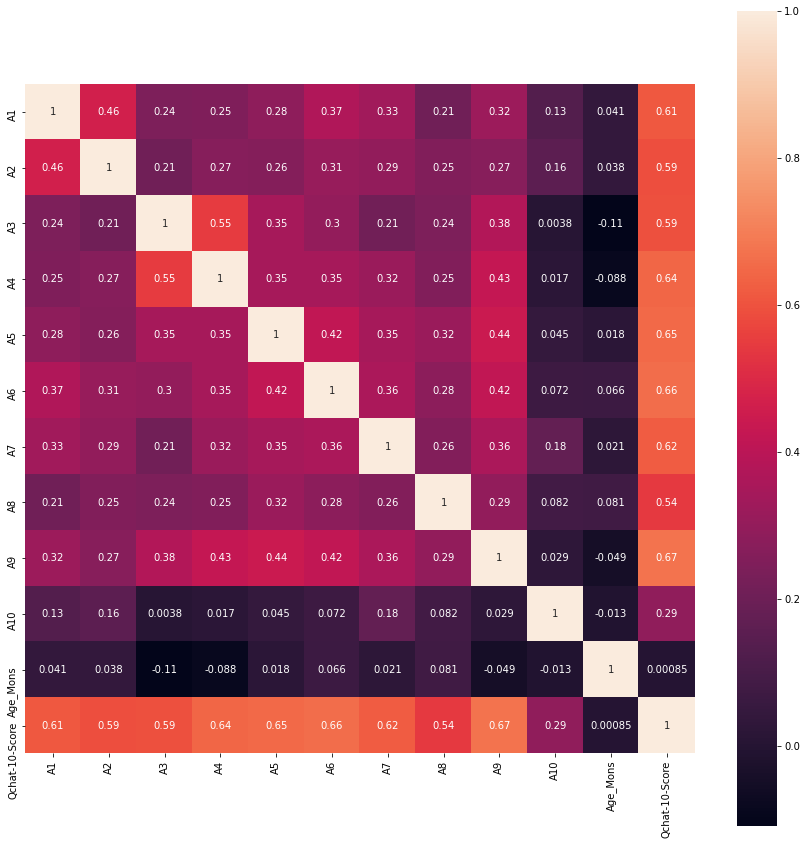

In [5]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [6]:
asd.drop('Qchat-10-Score', axis = 1, inplace = True)
asd.drop('Ethnicity', axis = 1, inplace = True)


In [8]:
le = LabelEncoder()
columns = ['Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int32
Jaundice               int32
Family_mem_with_ASD    int32
Class/ASD Traits       int32
dtype: object

In [9]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [10]:
#running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


In [11]:
# self provided features with Autism
arr = np.array([[1,1,1,1,0,0,0,0,0,0,12,1,1,1]])
svc1.predict(arr)

array([1])

In [12]:
# self provided features with no Autism
arr2 = np.array([[1,0,0,1,0,0,0,0,0,0,12,1,1,1]])
svc1.predict(arr2)

array([0])

In [13]:
# Using tensorflow for using the model in Android app

import tensorflow as tf


In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=14, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Train on 843 samples
Epoch 1/150
843/843 [==============================] - 4s 4ms/sample - loss: 1.3757 - accuracy: 0.6145
Epoch 2/150
843/843 [==============================] - 0s 171us/sample - loss: 0.3356 - accuracy: 0.8707
Epoch 3/150
843/843 [==============================] - 0s 161us/sample - loss: 0.2784 - accuracy: 0.8814
Epoch 4/150
843/843 [==============================] - 0s 161us/sample - loss: 0.2381 - accuracy: 0.9098
Epoch 5/150
843/843 [==============================] - 0s 171us/sample - loss: 0.2039 - accuracy: 0.9158
Epoch 6/150
843/843 [==============================] - 0s 180us/sample - loss: 0.1823 - accuracy: 0.9241
Epoch 7/150
843/843 [==============================] - 0s 161us/sample - loss: 0.1681 - accuracy: 0.9348
Epoch 8/150
843/843 [==============================] - 0s 171us/sample - loss: 0.1557 - accuracy: 0.9371
Epoch 9/150
843/843 [==============================] - 0s 199us/sample - loss: 0.1459 - accuracy: 0.9431
Epoch 10/150
843/843 [==============

843/843 [==============================] - 0s 171us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 78/150
843/843 [==============================] - 0s 161us/sample - loss: 0.0056 - accuracy: 1.0000
Epoch 79/150
843/843 [==============================] - 0s 161us/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 80/150
843/843 [==============================] - 0s 161us/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 81/150
843/843 [==============================] - 0s 152us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 82/150
843/843 [==============================] - 0s 161us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 83/150
843/843 [==============================] - 0s 161us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 84/150
843/843 [==============================] - 0s 152us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 85/150
843/843 [==============================] - 0s 152us/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 86/150
843/843 [==============================] - 0s 

In [27]:
val = model.predict(arr2)
print(val)
if(val < 1):
    print('yes')
else:
    print('no')


[[2.2706237e-05]]
yes


In [21]:
model.predict(arr)

array([[0.99339265]], dtype=float32)

In [22]:
model.predict(x_test)

array([[9.93984759e-01],
       [5.15781551e-07],
       [5.15781551e-07],
       [1.00000000e+00],
       [9.99968410e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.94900576e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.28643978e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.09939188e-07],
       [8.95575714e-12],
       [1.00000000e+00],
       [1.54165104e-02],
       [1.00000000e+00],
       [9.99163985e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.76512188e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.82487231e-09],
       [9.99983668e-01],
       [1.00000000e+00],
       [5.89443587e-13],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.04591899e-07],


In [28]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

211/211 [==============================] - 0s 1ms/sample - loss: 6.4439e-04 - accuracy: 1.0000
Accuracy: 100.00


In [30]:
from tensorflow import lite

save = "FinalAutismModel.h5"
tf.keras.models.save_model(model,save)
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()
open("FinalAutismModel.tflite","wb").write(tfmodel)

3524